In [8]:
import warnings
warnings.simplefilter("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [10]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.shape

(1599, 12)

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

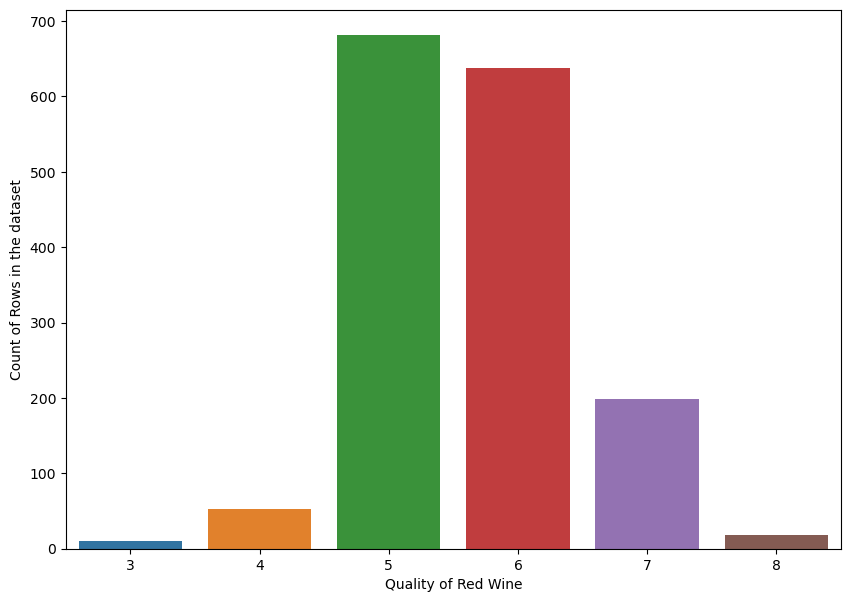

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

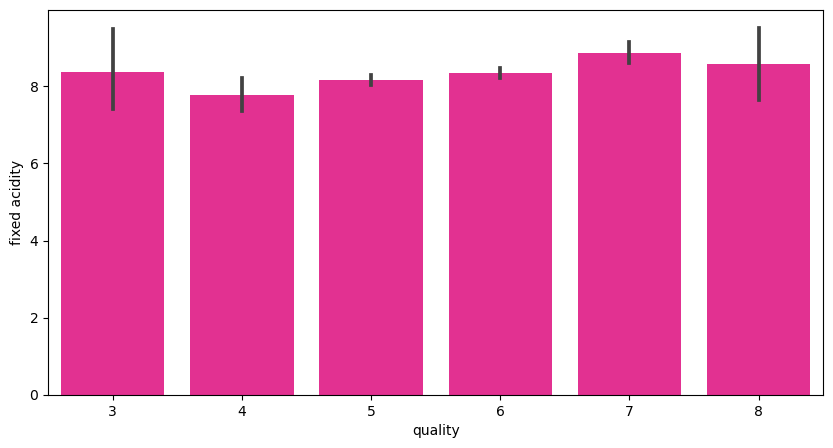

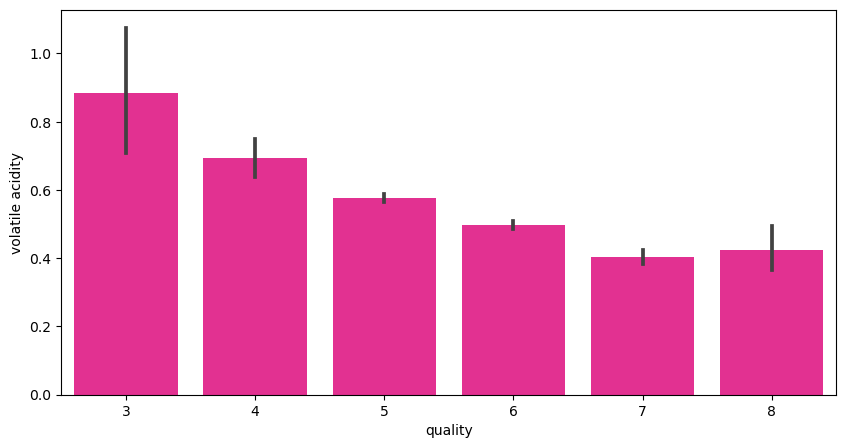

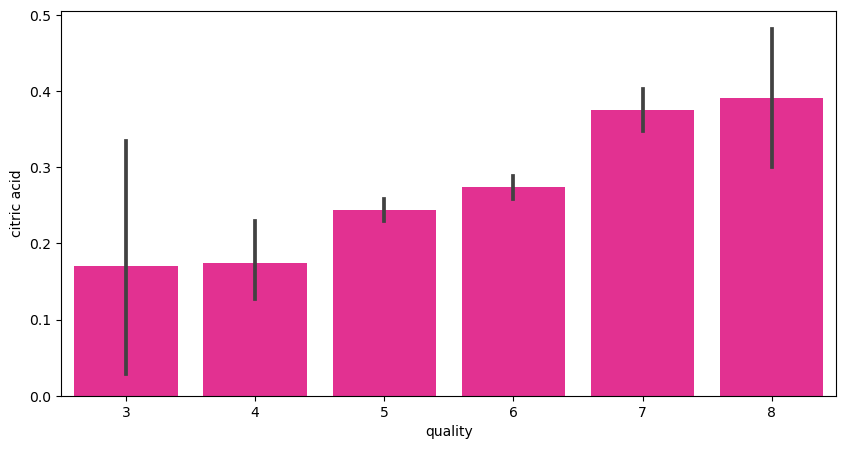

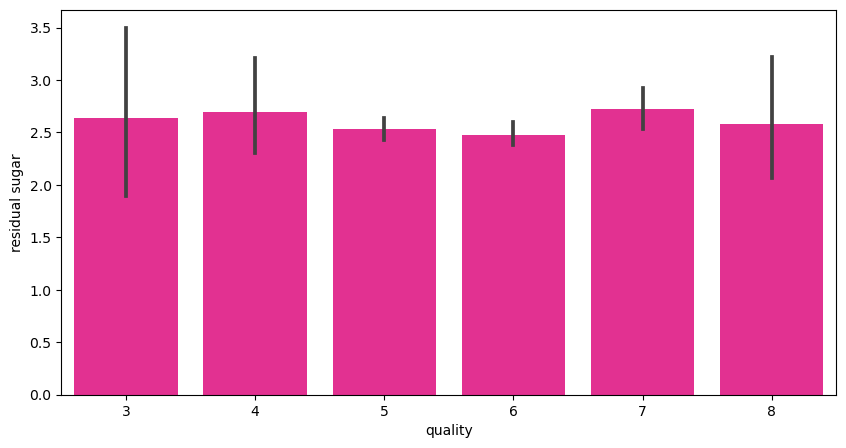

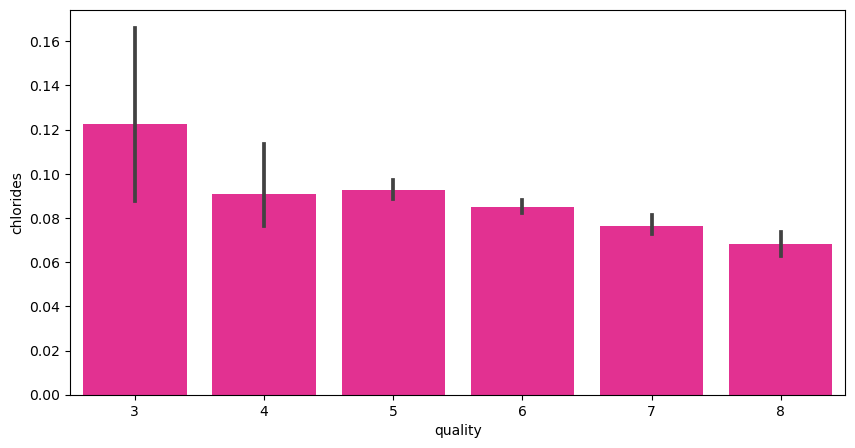

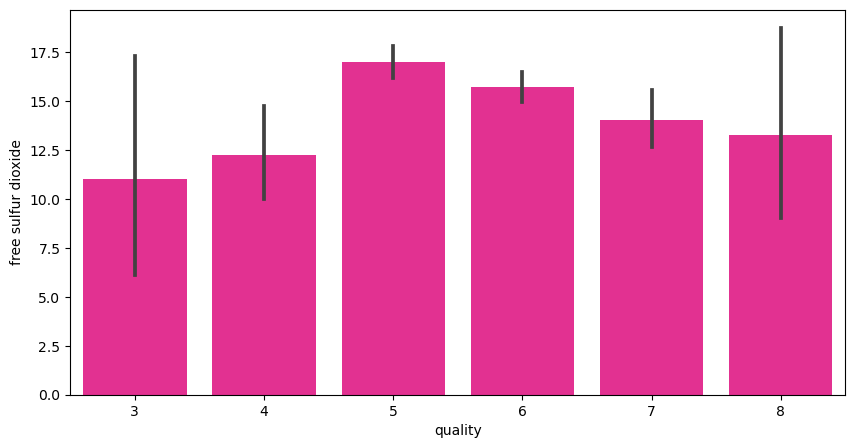

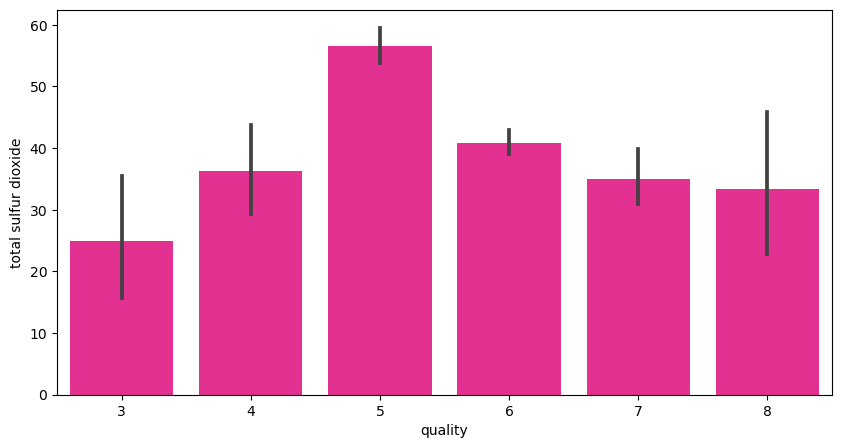

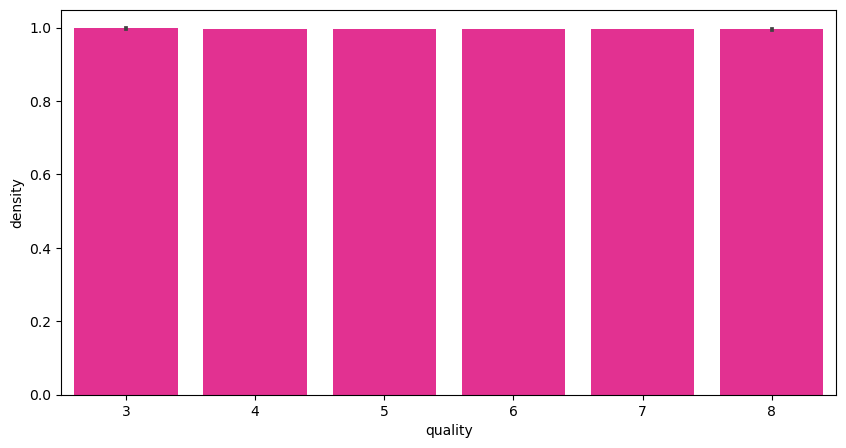

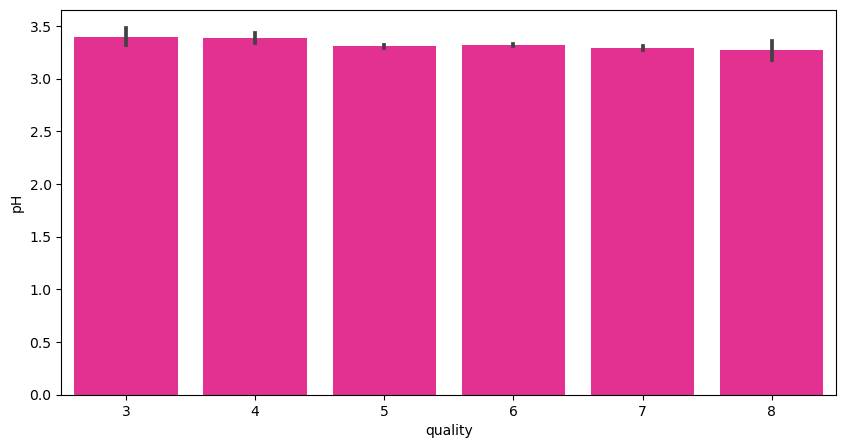

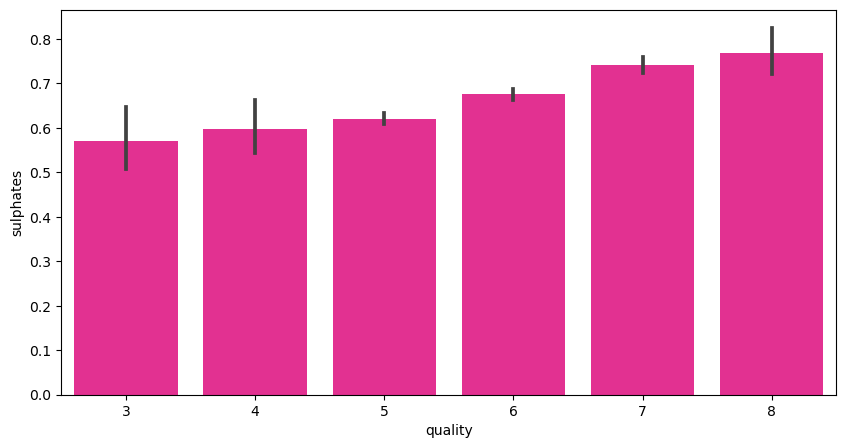

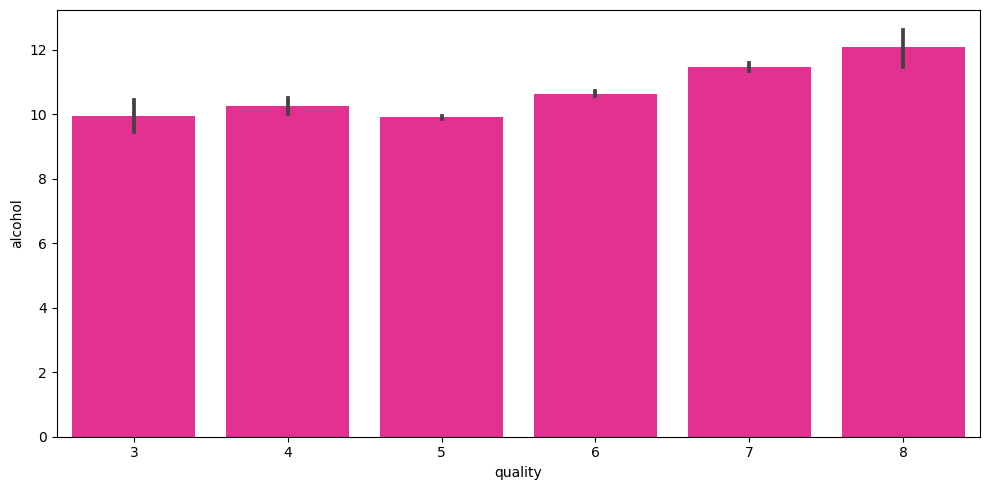

In [17]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

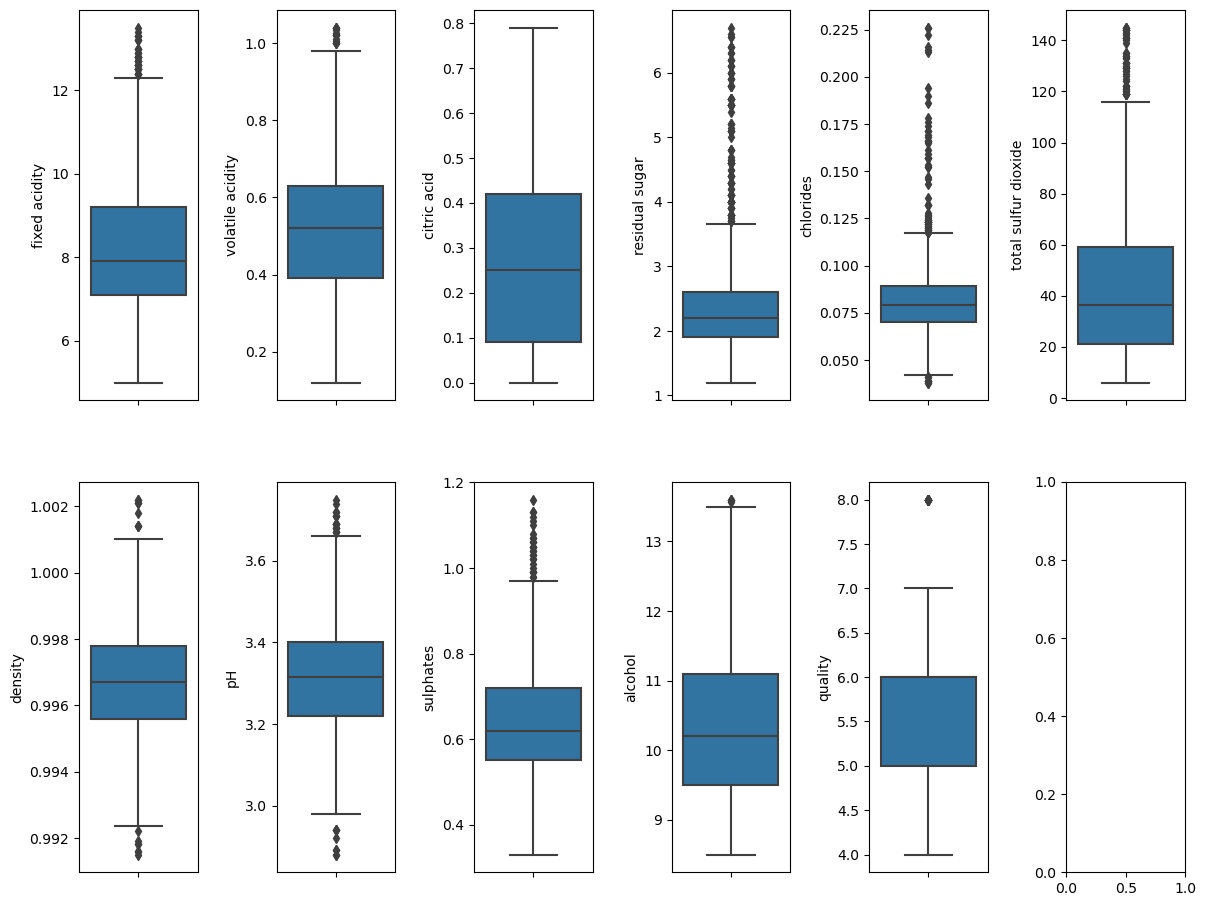

In [57]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(12,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

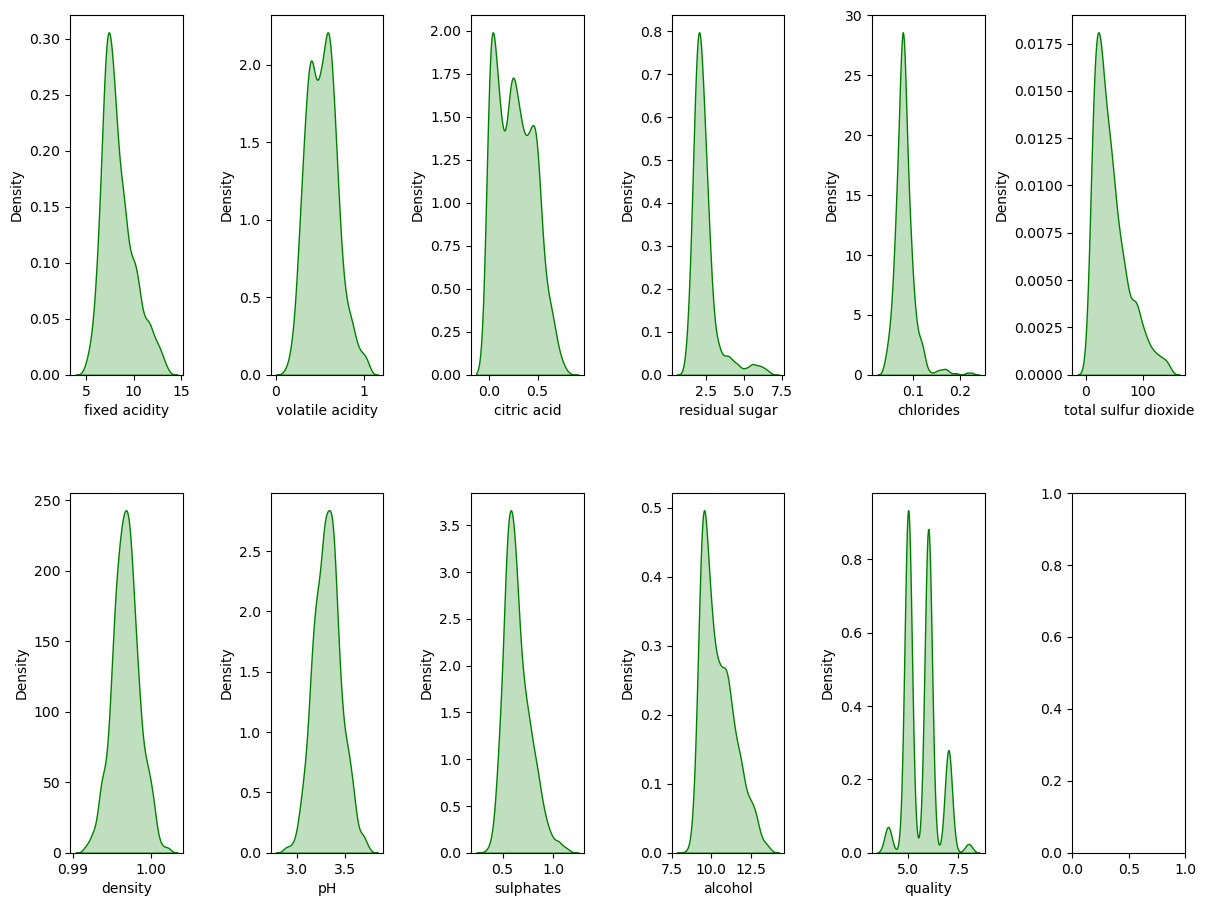

In [58]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(12,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

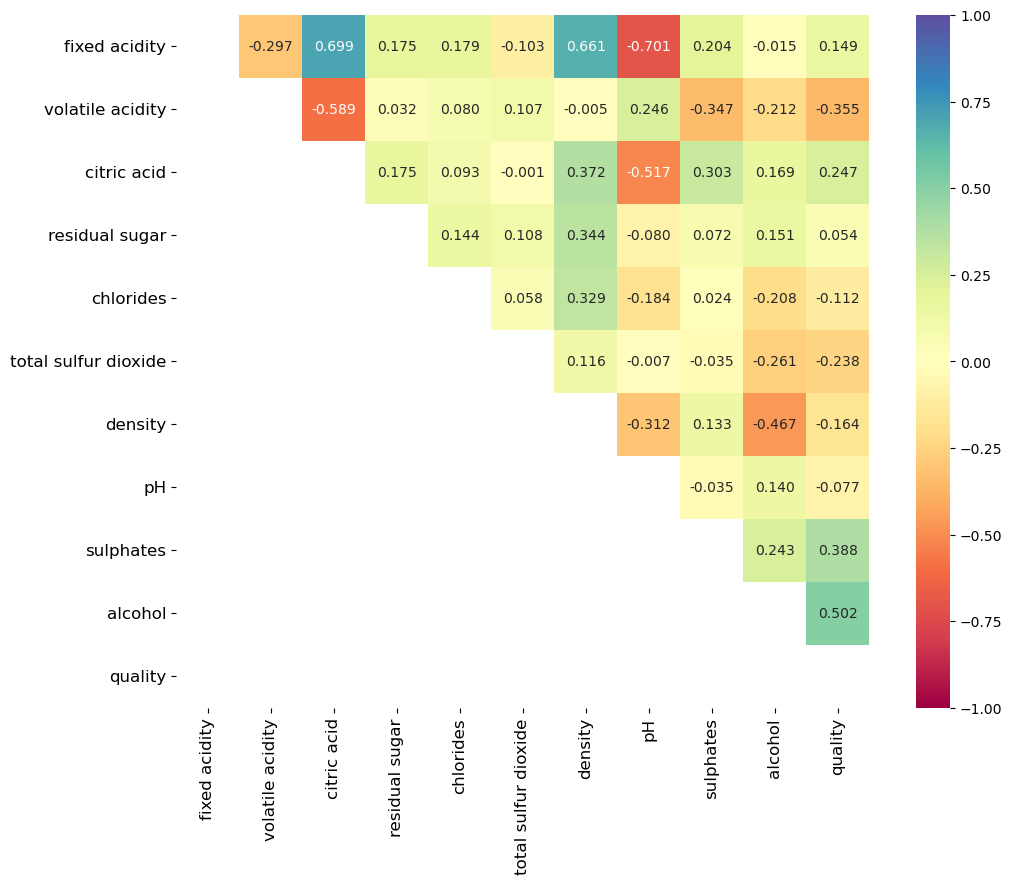

In [59]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
df.shape

(1599, 11)

In [23]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df.shape

(1464, 11)

In [25]:
data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

In [26]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [27]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [28]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [29]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [30]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) 
Y 

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [31]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,10.811702,0.587447,0.623674,4.774304,0.084498,19.626023,0.998223,3.222504,0.691252,13.149591
3116,10.778314,0.607725,0.619366,4.785720,0.084466,18.693126,0.997810,3.216931,0.694603,13.353969
3117,9.181724,0.334924,0.527986,2.756345,0.079418,17.000000,0.995811,3.157276,0.890896,11.903725
3118,9.959599,0.312436,0.491605,5.038396,0.075648,14.512893,0.997146,3.199742,0.857822,12.259599


In [32]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.667484,1.042388,-1.506116,-0.643347,-0.139336,-0.089020,0.839549,1.475167,-0.796823,-1.251022
1,-0.414377,2.055304,-1.506116,0.152115,1.090592,1.179085,0.222333,-0.772976,0.111040,-0.892674
2,-0.414377,1.380026,-1.300705,-0.188797,0.755157,0.679529,0.345776,-0.337852,-0.115926,-0.892674
3,1.737033,-1.321082,1.369644,-0.643347,-0.195242,0.910093,0.962992,-1.063059,-0.645513,-0.892674
4,-0.667484,1.042388,-1.506116,-0.643347,-0.139336,-0.089020,0.839549,1.475167,-0.796823,-1.251022
...,...,...,...,...,...,...,...,...,...,...
3115,1.491331,0.409016,1.696630,2.622941,0.335726,-0.641375,1.100511,-0.609775,0.196167,2.108127
3116,1.470204,0.523128,1.674505,2.635914,0.333942,-0.677223,0.845925,-0.650190,0.221520,2.291224
3117,0.459933,-1.012006,1.205244,0.329782,0.051746,-0.742286,-0.388306,-1.082815,1.706583,0.991992
3118,0.952147,-1.138557,1.018414,2.923048,-0.159039,-0.837859,0.435971,-0.774846,1.456359,1.310810


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [61]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [35]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.62179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       391
           1       0.84      0.85      0.85       233

    accuracy                           0.89       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624

Cross Validation Score: 87.08333333333333

Accuracy Score - Cross Validation Score is 1.538461538461533


In [62]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=32)
classify(model, X, Y)

Accuracy Score: 90.8119658119658

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       558
           1       0.89      0.88      0.89       378

    accuracy                           0.91       936
   macro avg       0.91      0.90      0.90       936
weighted avg       0.91      0.91      0.91       936

Cross Validation Score: 89.55128205128204

Accuracy Score - Cross Validation Score is 1.2606837606837615


In [40]:
model=DecisionTreeClassifier(random_state=16, max_depth=18)
classify(model, X, Y)

Accuracy Score: 91.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       391
           1       0.88      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 88.0448717948718

Accuracy Score - Cross Validation Score is 3.6217948717948616


In [63]:
model=RandomForestClassifier(max_depth=10, random_state=143)
classify(model, X, Y)

Accuracy Score: 93.69658119658119

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       558
           1       0.92      0.92      0.92       378

    accuracy                           0.94       936
   macro avg       0.93      0.93      0.93       936
weighted avg       0.94      0.94      0.94       936

Cross Validation Score: 91.31410256410255

Accuracy Score - Cross Validation Score is 2.3824786324786373


In [42]:
model=KNeighborsClassifier(n_neighbors=20)
classify(model, X, Y)

Accuracy Score: 90.7051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       391
           1       0.85      0.91      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 87.78846153846155

Accuracy Score - Cross Validation Score is 2.916666666666657


In [43]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 93.30128205128206

Accuracy Score - Cross Validation Score is 2.051282051282044


In [44]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

NameError: name 'xgb' is not defined

In [45]:
model=lgb.LGBMClassifier()
classify(model, X, Y)

NameError: name 'lgb' is not defined

In [46]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [47]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [48]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [49]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [52]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=30,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.1474358974359


In [53]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'